In [18]:
from pathlib import Path
import os
from datetime import date
import re
import glob
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import dask.dataframe as dd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [3]:
dataFolder = Path('/Users/alex/Dropbox/Work/GNS/SSIF/6 Flagship_Hikurangi/PilotStudy2020_2021/Exposure/Exposure Development/HB Liquefaction_2016/building & people')
os.listdir(dataFolder)

['RiskScape_Bldg_attributes.xlsx',
 'HB RKS Asset Model.pptx',
 'HB_BLDG_POP_final.csv']

In [7]:
exposure = pd.read_csv(dataFolder / 'HB_BLDG_POP_final.csv')
exposure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91392 entries, 0 to 91391
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BLDG_ID     91392 non-null  int64  
 1   NZMGE       91392 non-null  float64
 2   NZMGN       91392 non-null  float64
 3   BLD_QUAL_N  91392 non-null  int64  
 4   CONST_TYPE  91392 non-null  int64  
 5   CNTS_VAL_T  91392 non-null  int64  
 6   CNTS_VAL_R  91392 non-null  int64  
 7   CNTS_VAL_F  91392 non-null  int64  
 8   NZDEP06     91392 non-null  int64  
 9   EMPL_DAILY  91392 non-null  int64  
 10  FLOOR_AREA  91392 non-null  float64
 11  FLOOR_HEIG  91392 non-null  float64
 12  FLOOR_TYPE  91392 non-null  int64  
 13  FOOTPRINT_  91392 non-null  float64
 14  OCC_DT      91392 non-null  int64  
 15  OCC_NT      91392 non-null  int64  
 16  PARAPET_NO  91392 non-null  int64  
 17  REPLACMENT  91392 non-null  int64  
 18  ROOF_CLAD_  91392 non-null  int64  
 19  ROOF_PITCH  91392 non-nul

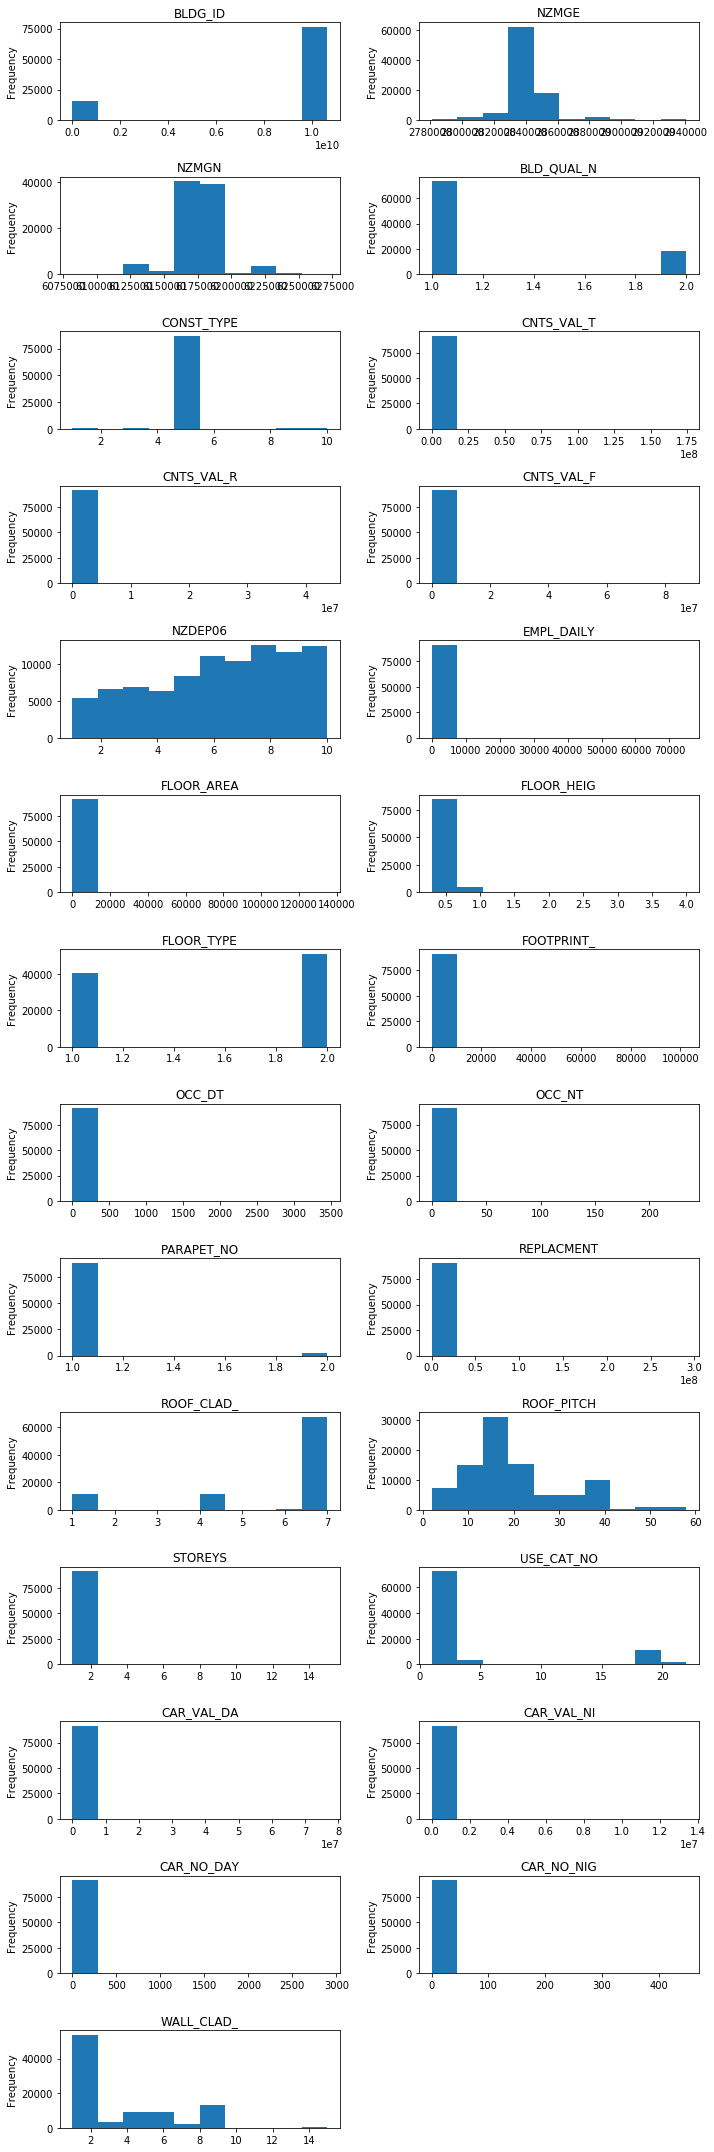

In [50]:
fig = plt.figure(figsize=(10,30))
# fig.subplots_adjust(hspace=2, wspace=2)

for c,num in zip(exposure.columns, range(1,28)):
    
    ax = fig.add_subplot(14,2,num)
    exposure[c].plot(kind="hist", ax=ax)
    ax.set_title(c)

plt.tight_layout()
plt.show()

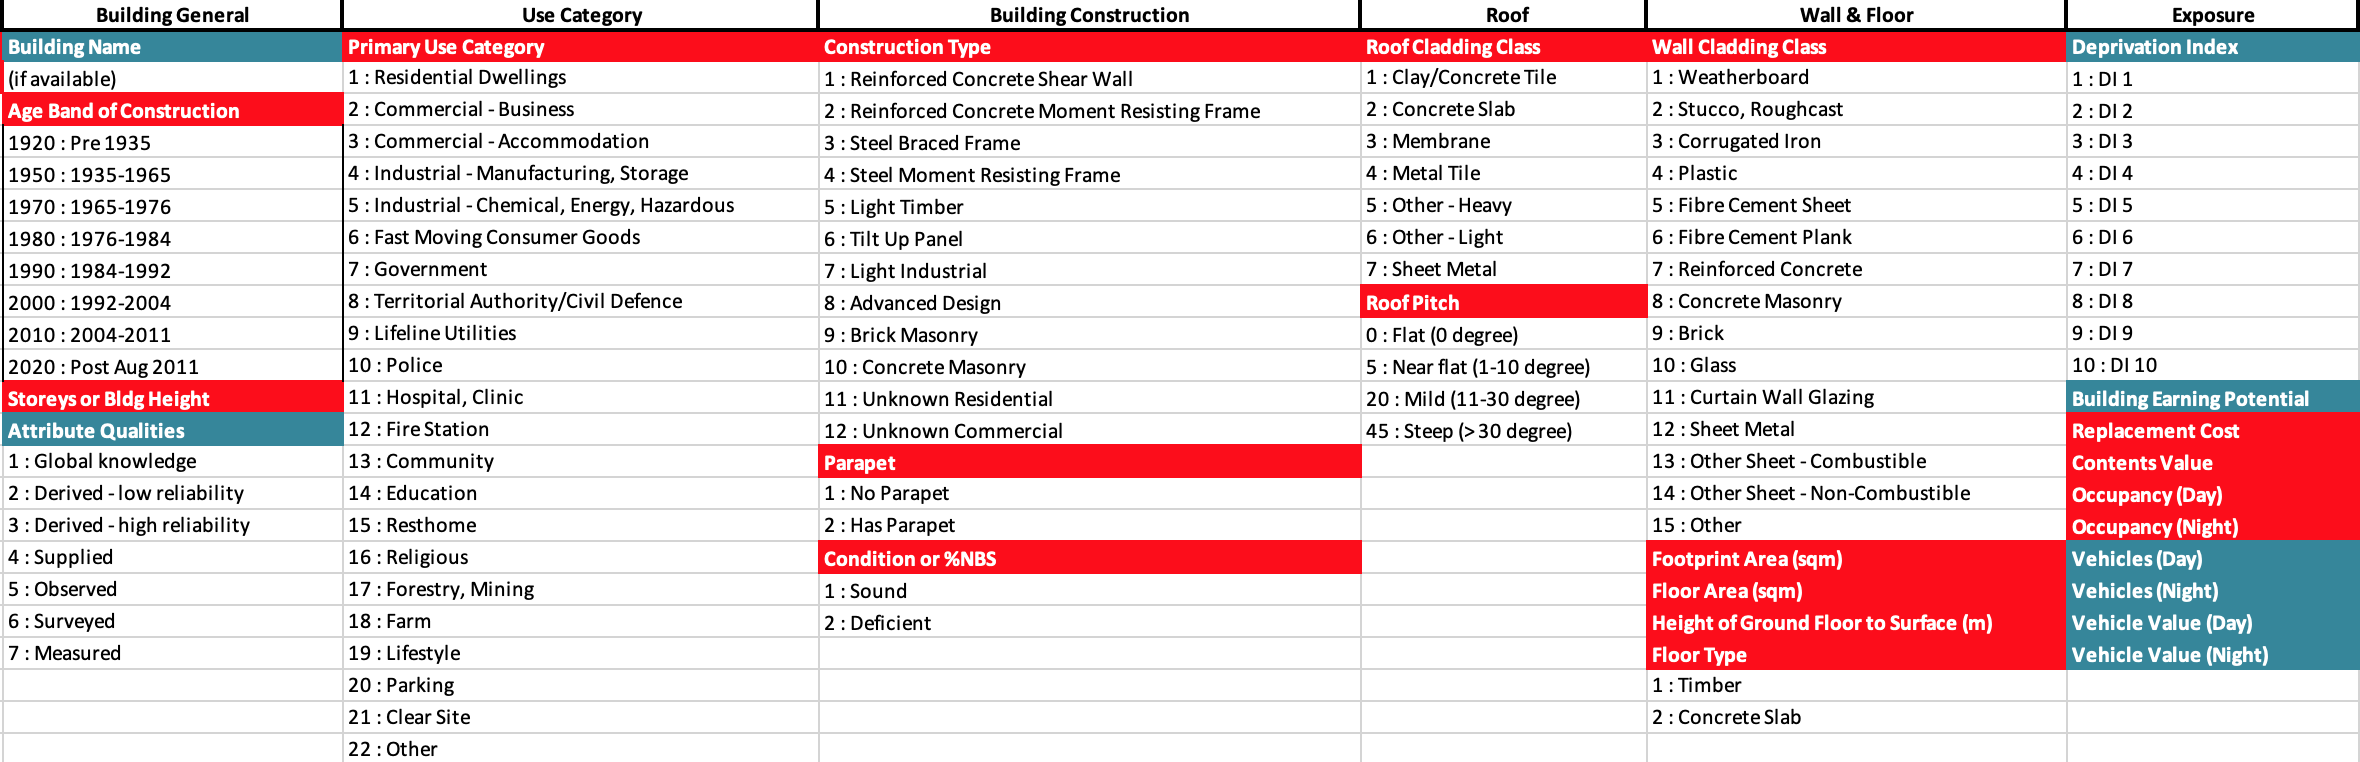

In [60]:
from IPython.display import Image
Image("/Users/alex/Dropbox/Screenshots/Screen Shot 2020-09-09 at 12.27.36 PM.png")

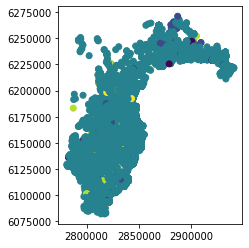

In [59]:
gdf = gpd.GeoDataFrame(
    exposure, geometry=gpd.points_from_xy(exposure.NZMGE, exposure.NZMGN))
gdf = gdf.set_crs(epsg=27200)
gdf.plot("CONST_TYPE")